In [15]:
import matplotlib.pyplot as plt

import Framework.Confounder_Injection as CI
import Framework.Models as Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import torch
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt
from IPython.display import Latex



# Validation with br_net data and multiple classes

In [16]:
batch_size = 64

## No confounder in training-data

In this case the network seems to learn to real feature. Adding confounder to the test-data leads to a lower accuracy (NN did not learn to handle this information). Nevertheless it is still able to recognize most of the classes. With higher number of epochs or samples this accuracy-loss might be prevented.

In [17]:
params = [
    [[1, 4], [3, 6], [5,8]], # real feature
    [[10, 12], [20, 22], [30,32]] # confounder
]

In [18]:
c = CI.confounder()
model = Models.BrNet(n_classes=3)
c.generate_data(mode="br-net", samples=512, train_confounding=0, test_confounding=np.arange(0, 1.01, 0.2), params=params)
l = c.train(model=model, epochs=50, optimizer=torch.optim.Adam, hyper_params={'lr':0.001, "weight_decay": 0, "batch_size":batch_size})

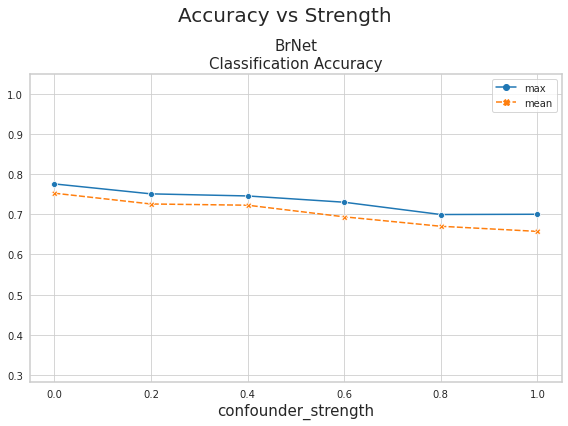

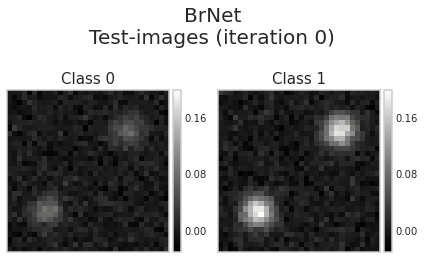

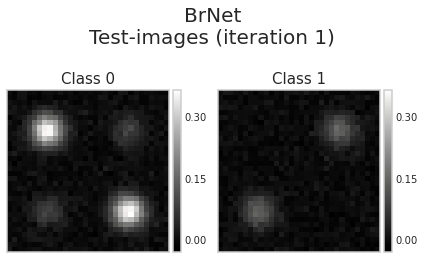

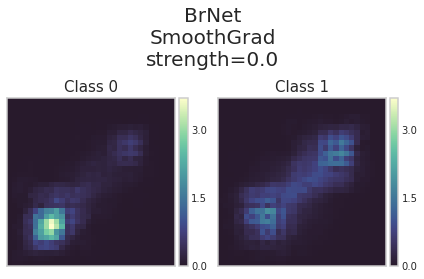

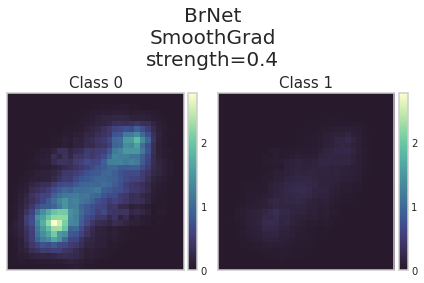

In [19]:
c.plot(accuracy_vs_strength=True, smoothgrad=True, saliency_iteration=[0,2], test_images=True, test_image_iteration=[0,1])

##  Confounder in training-data

### Theoretical upper bound

If the network learns only the confounder we can define an upper bound for the accuracy. Let + be the event where the model determines the correct class and - the event where the model fails. c is the event in which an image is confounded. By the law of total probability it holds that:
$$
P(+) = P(+|c) * P(c) + P(+|\neg{c}) * P(\neg{c})
$$

Since $P(\neg{c}) = 1- P(c)$ it further holds that:
$$
P(+|c) * P(c) + P(+|\neg{c}) * P(\neg{c}) = P(+|c) * P(c) + P(+|\neg{c}) * (1 - P(c))
$$
Because the network only learns the confounder, there is a $ \frac{1}{k} $ chance for guessing the outcome if no confounder is in the test data for k classes. If the confounder is seperable the network has a maximum probability of 1 for determining the correct class if a confounder is in the image. Therefore:
$$
P(+|\neg{c}) = \frac{1}{k}, \\P(+|c) = 1
$$
Putting these in (2) results in:
$$
1 * P(c) + \frac{1}{k} * (1 - P(c))
$$
Therefore if the network learns only the confounder and the confounder is seperable, an upper bound, depending on $P(c)$, for k classes exists.

In both cases (3 and 5 classes) the network seems to only learn the confounder. If we vary P(c) in the test-set we can see that the accuracy of the network perfectly fits the theoretical upper bound. If the network learns the con

In [20]:
params = [
    [[1, 4], [3, 6], [5,8]], # real feature
    [[10, 12], [20, 22], [30,32]] # confounder
]

In [21]:
c = CI.confounder()
model = Models.BrNet(n_classes=3)
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.05), params=params)
l = c.train(model=model, epochs=50, optimizer=torch.optim.Adam, hyper_params={'lr':0.001, "weight_decay": 0, "batch_size":batch_size})

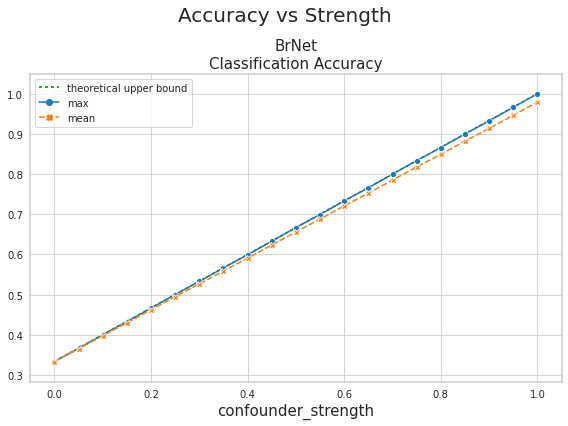

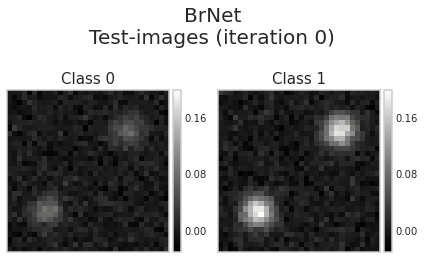

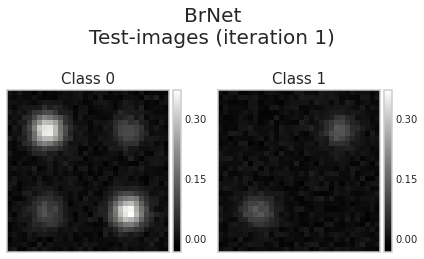

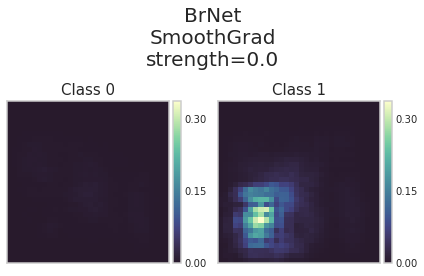

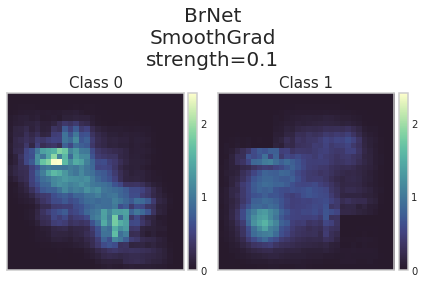

In [22]:
c.plot(accuracy_vs_strength=True, smoothgrad=True, saliency_iteration=[0,2], test_images=True, test_image_iteration=[0,1], epoch_vs_strength_ideal=True)

In [23]:
params = [
    [[1, 4], [3, 6], [5, 8], [7, 10], [9, 12]], # real feature
    [[10, 12], [13, 14], [16, 18], [19,20], [21, 22]] # confounder
]

In [24]:
c = CI.confounder()
model = Models.BrNet(n_classes=5)
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.05), params=params)
l = c.train(model=model, epochs=50, optimizer=torch.optim.Adam, hyper_params={'lr':0.001, "weight_decay": 0, "batch_size":batch_size})

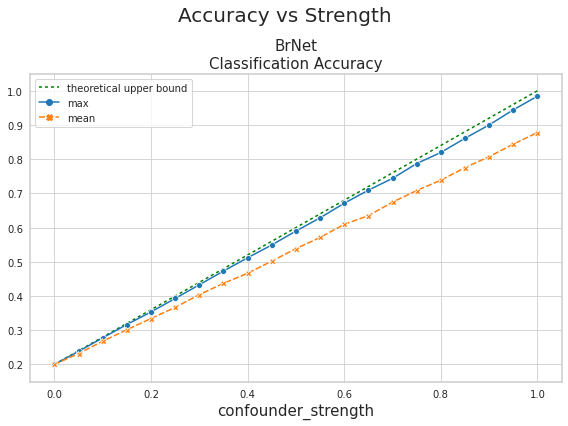

In [25]:
c.plot(accuracy_vs_strength=True, epoch_vs_strength_ideal=True)

In [26]:
batch_size = 64

## No confounder in training-data

In this case the network seems to learn to real feature. Adding confounder to the test-data leads to a lower accuracy (NN did not learn to handle this information). Nevertheless it is still able to recognize most of the classes. With higher number of epochs or samples this accuracy-loss might be prevented.

In [27]:
params = [
    [[1, 4], [3, 6], [5,8]], # real feature
    [[10, 12], [20, 22], [30,32]] # confounder
]

In [28]:
c = CI.confounder()
model = Models.BrNet(n_classes=3)
c.generate_data(mode="br-net", samples=512, train_confounding=0, test_confounding=np.arange(0, 1.01, 0.2), params=params)
l = c.train(model=model, epochs=50, optimizer=torch.optim.Adam, hyper_params={'lr':0.001, "weight_decay": 0, "batch_size":batch_size})

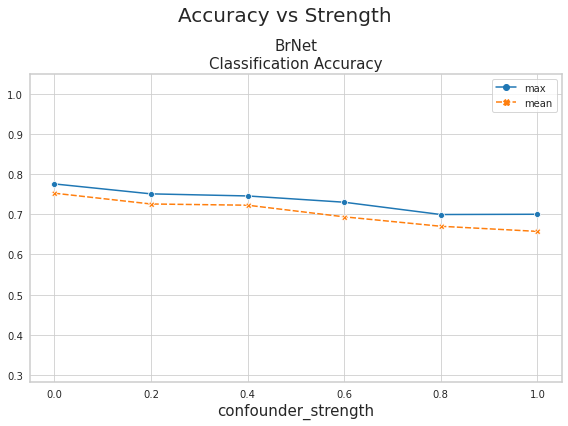

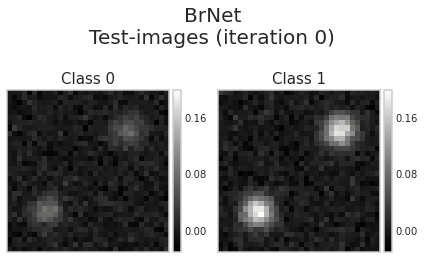

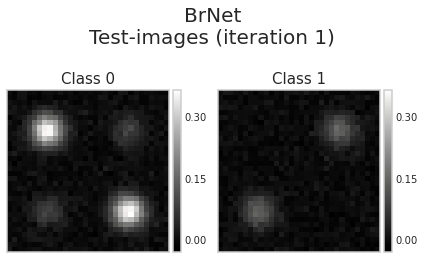

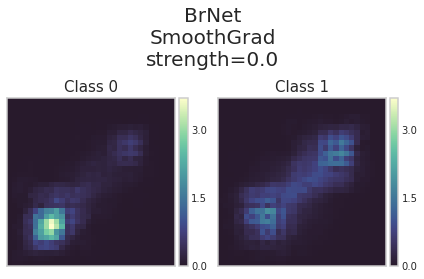

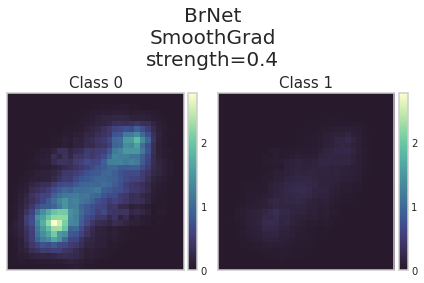

In [29]:
c.plot(accuracy_vs_strength=True, smoothgrad=True, saliency_iteration=[0,2], test_images=True, test_image_iteration=[0,1])

##  Confounder in training-data

### Theoretical upper bound

If the network learns only the confounder we can define an upper bound for the accuracy. Let + be the event where the model determines the correct class and - the event where the model fails. c is the event in which an image is confounded. By the law of total probability it holds that:
$$
P(+) = P(+|c) * P(c) + P(+|\neg{c}) * P(\neg{c})
$$

Since $P(\neg{c}) = 1- P(c)$ it further holds that:
$$
P(+|c) * P(c) + P(+|\neg{c}) * P(\neg{c}) = P(+|c) * P(c) + P(+|\neg{c}) * (1 - P(c))
$$
Because the network only learns the confounder, there is a $ \frac{1}{k} $ chance for guessing the outcome if no confounder is in the test data for k classes. If the confounder is seperable the network has a maximum probability of 1 for determining the correct class if a confounder is in the image. Therefore:
$$
P(+|\neg{c}) = \frac{1}{k}, \\P(+|c) = 1
$$
Putting these in (2) results in:
$$
1 * P(c) + \frac{1}{k} * (1 - P(c))
$$
Therefore if the network learns only the confounder and the confounder is seperable, an upper bound, depending on $P(c)$, for k classes exists.

In both cases (3 and 5 classes) the network seems to only learn the confounder. If we vary P(c) in the test-set we can see that the accuracy of the network perfectly fits the theoretical upper bound. If the network learns the con

In [30]:
params = [
    [[1, 4], [3, 6], [5,8]], # real feature
    [[10, 12], [20, 22], [30,32]] # confounder
]

In [31]:
c = CI.confounder()
model = Models.BrNet(n_classes=3)
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.05), params=params)
l = c.train(model=model, epochs=50, optimizer=torch.optim.Adam, hyper_params={'lr':0.001, "weight_decay": 0, "batch_size":batch_size})

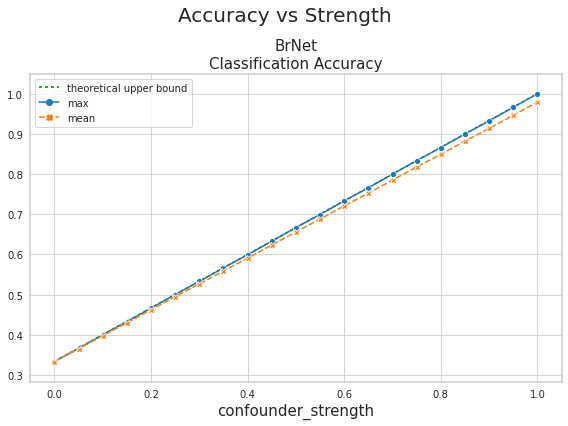

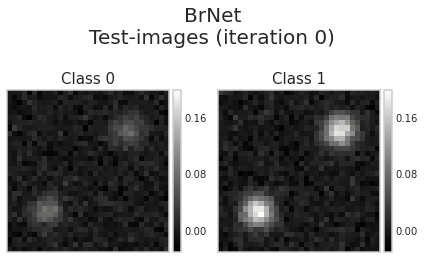

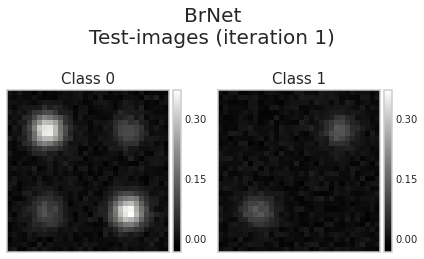

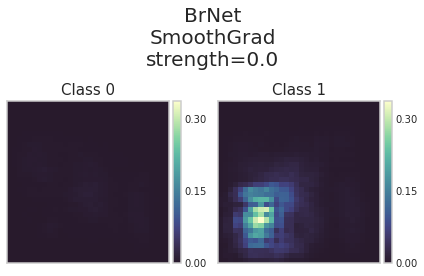

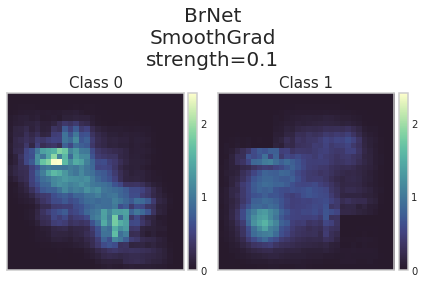

In [32]:
c.plot(accuracy_vs_strength=True, smoothgrad=True, saliency_iteration=[0,2], test_images=True, test_image_iteration=[0,1], epoch_vs_strength_ideal=True)

In [33]:
params = [
    [[1, 4], [3, 6], [5, 8], [7, 10], [9, 12]], # real feature
    [[10, 12], [13, 14], [16, 18], [19,20], [21, 22]] # confounder
]

In [34]:
c = CI.confounder()
model = Models.BrNet(n_classes=5)
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.05), params=params)
l = c.train(model=model, epochs=50, optimizer=torch.optim.Adam, hyper_params={'lr':0.001, "weight_decay": 0, "batch_size":batch_size})

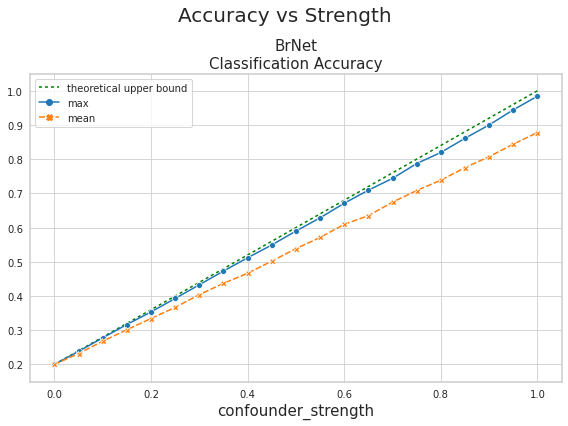

In [35]:
c.plot(accuracy_vs_strength=True, epoch_vs_strength_ideal=True)